Interested in seeing the relationship between the Covid virus infection rate and population in regards to each states size , that is the Population density against confirmed cases.



The best way to do this is to plot a diagram displaying the map of Nigeria , using each states geographical segmentation as an idea of each states size

Then using colour variation to show the number of confirmed cases per each states while also annotating their population density on the map

In other to plot the map of Nigeria, We need a shapely data 'shapefiles(.shp)', the data needs to be in polygon or multipolygon format 

Also employ the Geopandas Dataframe, Geopandas makes working easier with geospatial data (data that has a geographic component to it) in Python.

In [86]:
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

### Data extraction

In [66]:
# lets scrape the ncdc data used in the previos repository
url='https://covid19.ncdc.gov.ng/'

In [67]:
page=requests.get(url)

In [68]:
soup=BeautifulSoup(page.text,'lxml')

In [69]:
table=soup.find('div', {'class':'table-responsive'})

In [70]:
headers=[]

for i in table.find_all('th'):
    title=i.text
    headers.append(title)

In [71]:
df1=pd.DataFrame(columns=headers)

In [72]:
for row in table.find_all('tr')[1:]:
    data=row.find_all('td')
    row_data=[td.text.strip() for td in data]
    length=len(df1)
    df1.loc[length]=row_data

In [73]:
df1.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"104,219","1,076","102,372",771
1,FCT,"29,530",9,"29,272",249
2,Rivers,"18,108",-3,"17,956",155
3,Kaduna,"11,630",1,"11,540",89
4,Oyo,"10,352",0,"10,150",202


In [74]:
import geopandas as gpd

In [75]:
# getting the shapely data that has a geometry column containing multipolygon values for each state
url= ('https://raw.githubusercontent.com/Enoch768/Nigeria-Weather/main/Niger_geojson.geojson')
df = gpd.read_file(url)

In [76]:
df.head()

,admin1Name,admin1Pcod,admin1RefN,admin1AltN,admin1Al_1,admin0Name,admin0Pcod,date,validOn,validTo,Shape_Leng,Shape_Area,geometry
0,Abia,NG001,Abia,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,4.695135,0.396543,"MULTIPOLYGON (((7.38681 6.03667, 7.38729 6.036..."
1,Adamawa,NG002,Adamawa,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,11.525443,3.113007,"MULTIPOLYGON (((13.62129 10.94823, 13.62592 10..."
2,Akwa Ibom,NG003,Akwa Ibom,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,5.263830,0.549476,"MULTIPOLYGON (((8.34482 4.61140, 8.34496 4.609..."
3,Anambra,NG004,Anambra,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,3.595960,0.392661,"MULTIPOLYGON (((6.93254 6.71090, 6.93167 6.698..."
4,Bauchi,NG005,Bauchi,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,13.952005,4.011018,"MULTIPOLYGON (((10.75125 12.46148, 10.75615 12..."


In [77]:
# Data containing population and poulation density used in previous repository
url='https://github.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/blob/main/covid_external.csv?raw=True'
covid=pd.read_csv(url)

In [78]:
covid.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


### DATA PROCESSING

In [79]:
df2= covid[['states','Population','Population Density']]

In [88]:
df2.head()

,States Affected,Population,Population Density
0,FCT,4865000,0.9
1,Plateau,4766000,0.3
2,Kwara,3524000,0.2
3,Nasarawa,2783000,0.1
4,Niger,6260000,0.1


In [81]:
df2.rename(columns={'states': 'States Affected'}, inplace= True)
df2['States Affected']=df2['States Affected'].replace({'Nassarawa':'Nasarawa'})

In [82]:
df['admin1Name']=df['admin1Name'].replace({'Federal Capital Territory':'FCT'})
df.rename(columns={'admin1Name': 'States Affected'}, inplace= True)

In [83]:
# merge all three datasets
merged=df.merge(df1,on='States Affected').merge(df2,on='States Affected')
merged.set_index('States Affected', inplace= True)

In [84]:
merged.head()

,admin1Pcod,admin1RefN,admin1AltN,admin1Al_1,admin0Name,admin0Pcod,date,validOn,validTo,Shape_Leng,Shape_Area,geometry,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,Population,Population Density
States Affected,,,,,,,,,,,,,,,,,,
Abia,NG001,Abia,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,4.695135,0.396543,"MULTIPOLYGON (((7.38681 6.03667, 7.38729 6.036...","2,263",0,"2,229",34,4190000,0.9
Adamawa,NG002,Adamawa,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,11.525443,3.113007,"MULTIPOLYGON (((13.62129 10.94823, 13.62592 10...","1,312",134,"1,140",38,4672000,0.3
Akwa Ibom,NG003,Akwa Ibom,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,5.263830,0.549476,"MULTIPOLYGON (((8.34482 4.61140, 8.34496 4.609...","5,010",6,"4,960",44,6093000,0.8
Anambra,NG004,Anambra,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,3.595960,0.392661,"MULTIPOLYGON (((6.93254 6.71090, 6.93167 6.698...","2,825",46,"2,760",19,6050000,1.0
Bauchi,NG005,Bauchi,None,None,Nigeria,NG,2016-11-29,2016-12-15,None,13.952005,4.011018,"MULTIPOLYGON (((10.75125 12.46148, 10.75615 12...","2,028",2,"2,002",24,7270000,0.2


### MAP PLOT

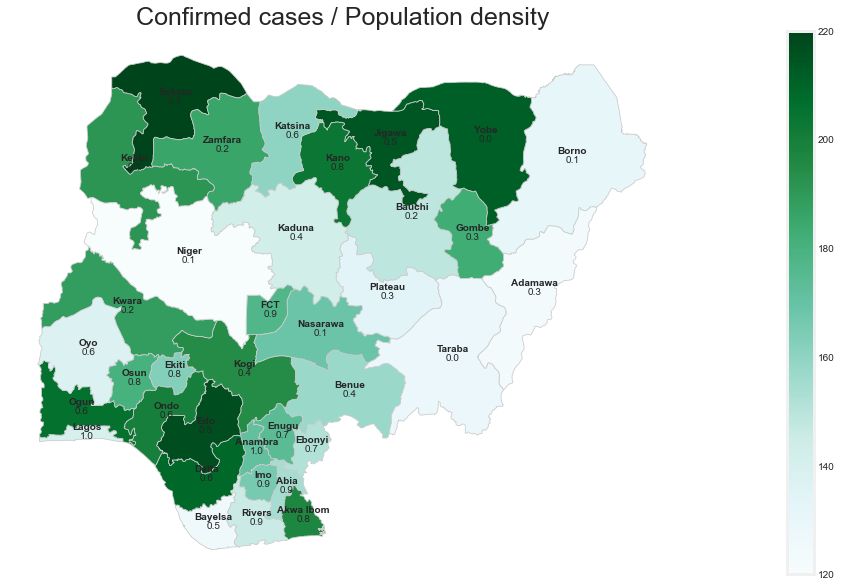

In [87]:
variable = 'No. of Cases (Lab Confirmed)'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(35, 10))

merged.plot(column=variable, cmap='BuGn', linewidth=0.8, ax=ax, edgecolor='0.8')
# remove the axis
ax.axis("off")
# add a title
ax.set_title('Confirmed cases / Population density', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
#saving our map as .png file.
fig.savefig('map_export.png', dpi=300)

for coord, label in zip(merged.geometry, merged.index,):
    ax.annotate(label, xy=(coord.centroid.coords[0]), xytext=(3,3), textcoords='offset points',va='bottom',ha='center',weight='bold')
for coord, label in zip(merged.geometry, merged['Population Density']):
    ax.annotate(label, xy=(coord.centroid.coords[0]), xytext=(3,3), textcoords='offset points', ha='center',va='top')

There is an appreciable correlation between the population density and number of confirmed cases as some very high number of cases show high population density and most areas in the north with large square areas show low number of cases 

but some states dont show the desired results or correlation, especially Lagos